<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1/LSB_DS_131_Statistics_Probability_Assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)
5.You also practice some 1-sample t-tests
6.You try and create some kind of a visualization that communicates the results of your hypothesis tests. This can be as simple as a histogram of the p-values or the t-statistics.
-Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
import pandas as pd
cols = [   
   'party',
   'handicapped-infants',
   'water-project',
   'budget',
   'physician-fee-freeze',
   'el-salvador-aid',
   'religious-groups',
   'anti-satellite-ban',
   'aid-to-contras',
   'mx-missile',
   'immigration',
   'synfuels',
   'education',
   'right-to-sue',
   'crime',
   'duty_free',
   'south_Africa']
df = pd.read_csv('house-votes-84.data', names=cols)
df.head(1)


--2019-10-07 22:48:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-10-07 22:48:50 (609 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y


In [0]:
import numpy as np
df=df.replace({'?': 0.5, 'n':2, 'y':1})
#df=df.replace({'?':np.NaN})
df.head(8)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,republican,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.5,1.0,1.0,1.0,2.0,1.0
1,republican,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0
3,democrat,2.0,1.0,1.0,2.0,0.5,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0
4,democrat,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0
5,democrat,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
6,democrat,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.5,1.0,1.0,1.0
7,republican,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.5,1.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                   435 non-null object
handicapped-infants     435 non-null float64
water-project           435 non-null float64
budget                  435 non-null float64
physician-fee-freeze    435 non-null float64
el-salvador-aid         435 non-null float64
religious-groups        435 non-null float64
anti-satellite-ban      435 non-null float64
aid-to-contras          435 non-null float64
mx-missile              435 non-null float64
immigration             435 non-null float64
synfuels                435 non-null float64
education               435 non-null float64
right-to-sue            435 non-null float64
crime                   435 non-null float64
duty_free               435 non-null float64
south_Africa            435 non-null float64
dtypes: float64(16), object(1)
memory usage: 57.9+ KB


In [0]:
df.index

RangeIndex(start=0, stop=435, step=1)

In [0]:
df.shape

(435, 17)

In [0]:
df.party.value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
dfr = df[df['party'] =='republican']
dfr.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,republican,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.5,1.0,1.0,1.0,2.0,1.0
1,republican,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.5
7,republican,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.5,1.0
8,republican,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0
10,republican,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.5,0.5,1.0,1.0,2.0,2.0


In [0]:
dfr.sum(axis = 0, skipna = True) 

party                   republicanrepublicanrepublicanrepublicanrepubl...
handicapped-infants                                                 300.5
water-project                                                         231
budget                                                                308
physician-fee-freeze                                                168.5
el-salvador-aid                                                     174.5
religious-groups                                                      184
anti-satellite-ban                                                    288
aid-to-contras                                                      295.5
mx-missile                                                          312.5
immigration                                                         239.5
synfuels                                                            301.5
education                                                           181.5
right-to-sue                          

In [0]:
dfd = df[df['party'] =='democrat']
dfd.head(1)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0


In [0]:
dfd.sum(axis = 0, skipna = True) 

party                   democratdemocratdemocratdemocratdemocratdemocr...
handicapped-infants                                                 364.5
water-project                                                         372
budget                                                              292.5
physician-fee-freeze                                                  508
el-salvador-aid                                                       461
religious-groups                                                    397.5
anti-satellite-ban                                                    322
aid-to-contras                                                        310
mx-missile                                                          317.5
immigration                                                           404
synfuels                                                              387
education                                                             471
right-to-sue                          

- R: 55  D: 157 el-salvador-aid ?  p<0.1
- R: 218 D:  24 aid-to-contras  ?  p<0.

- R: 149 D: 123 religious-groups   p>0.1

In [0]:
import pandas as pd
import numpy as np
import scipy.stats as sp
#

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

#el-salvador-aid

- Republicans = 174
- Democratss  = 461
- Ttest_ind Result:
  - statistic= -17.306883696696488
  - pvalue= 2.194635042811006e-51


In [0]:
elS=sp.stats.ttest_ind(dfr['el-salvador-aid'], dfd['el-salvador-aid'])
elS

Ttest_indResult(statistic=-17.306883696696488, pvalue=2.194635042811006e-51)

In [0]:
dfr.head(1)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty_free,south_Africa
0,republican,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.5,1.0,1.0,1.0,2.0,1.0


In [0]:
dfre=dfr[['party','el-salvador-aid','budget']]
dfre.head()

,party,el-salvador-aid,budget
0,republican,1.0,2.0
1,republican,1.0,2.0
7,republican,1.0,2.0
8,republican,1.0,2.0
10,republican,1.0,2.0


In [0]:
dfde=dfd[['party','el-salvador-aid', 'budget']]
dfde.head()

,party,el-salvador-aid,budget
2,democrat,1.0,1.0
3,democrat,0.5,1.0
4,democrat,1.0,1.0
5,democrat,1.0,1.0
6,democrat,1.0,2.0


#aid-to-contra
  - Republicans = 218
  - Democratss =  24 
  - Ttest_indResult:
  - statistic= 14.298979643285657 
  - pvalue= 2.908877005256946e-38)

In [0]:
atc=sp.stats.ttest_ind(dfr['aid-to-contras'], dfd['aid-to-contras'])
atc

Ttest_indResult(statistic=14.298979643285657, pvalue=2.908877005256946e-38)

In [0]:
dfra=dfr[['party','aid-to-contras']]
dfre.head()

,party,el-salvador-aid,budget
0,republican,1.0,2.0
1,republican,1.0,2.0
7,republican,1.0,2.0
8,republican,1.0,2.0
10,republican,1.0,2.0


In [0]:
dfda=dfd[['party','aid-to-contras']]
dfde.head()

,party,el-salvador-aid,budget
2,democrat,1.0,1.0
3,democrat,0.5,1.0
4,democrat,1.0,1.0
5,democrat,1.0,1.0
6,democrat,1.0,2.0


#religous-groups
  - Republicans = 149
  - Democratss = 123
  - Ttest_indResult:
  - statistic= -8.792473019625342
  - pvalue= 3.4819628889277544e-17

In [0]:
rg=sp.stats.ttest_ind(dfr['religious-groups'], dfd['religious-groups'])
rg

Ttest_indResult(statistic=-8.792473019625342, pvalue=3.4819628889277544e-17)

In [0]:
dfrr=dfr[['party','religious-groups']]
dfrr.head()

,party,religious-groups
0,republican,1.0
1,republican,1.0
7,republican,1.0
8,republican,1.0
10,republican,2.0


In [0]:
dfdr=dfr[['party','religious-groups']]
dfdr.head()

,party,religious-groups
0,republican,1.0
1,republican,1.0
7,republican,1.0
8,republican,1.0
10,republican,2.0


In [0]:
religious=dfr[['religious-groups']]
religious

,religious-groups
0,1.0
1,1.0
7,1.0
8,1.0
10,2.0
11,1.0
14,1.0
15,1.0
18,1.0
28,2.0


In [0]:
relr=religious.rename(columns = {'religious-groups':'republican'})
religious

,religious-groups
0,1.0
1,1.0
7,1.0
8,1.0
10,2.0
11,1.0
14,1.0
15,1.0
18,1.0
28,2.0


In [0]:
religiousd=dfd[['religious-groups']]
religious 

,religious-groups
0,1.0
1,1.0
7,1.0
8,1.0
10,2.0
11,1.0
14,1.0
15,1.0
18,1.0
28,2.0


In [0]:
religiousd=religiousd.rename(columns = {'religious-groups':'democrat'})
religiousd

,democrat
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
9,2.0
12,2.0
13,1.0
16,1.0
17,2.0


In [0]:
import seaborn as sns
rep_dem=pd.merge(dfre, dfde, on='budget', how='inner')
rep_dem.head(10)

,party_x,el-salvador-aid_x,budget,party_y,el-salvador-aid_y
0,republican,1.0,2.0,democrat,1.0
1,republican,1.0,2.0,democrat,1.0
2,republican,1.0,2.0,democrat,1.0
3,republican,1.0,2.0,democrat,1.0
4,republican,1.0,2.0,democrat,2.0
5,republican,1.0,2.0,democrat,2.0
6,republican,1.0,2.0,democrat,2.0
7,republican,1.0,2.0,democrat,1.0
8,republican,1.0,2.0,democrat,1.0
9,republican,1.0,2.0,democrat,1.0


In [0]:
rep_dem=pd.merge(dfre, dfde, on='budget', how='inner')
rep_dem.head(10)

,party_x,el-salvador-aid_x,budget,party_y,el-salvador-aid_y
0,republican,1.0,2.0,democrat,1.0
1,republican,1.0,2.0,democrat,1.0
2,republican,1.0,2.0,democrat,1.0
3,republican,1.0,2.0,democrat,1.0
4,republican,1.0,2.0,democrat,2.0
5,republican,1.0,2.0,democrat,2.0
6,republican,1.0,2.0,democrat,2.0
7,republican,1.0,2.0,democrat,1.0
8,republican,1.0,2.0,democrat,1.0
9,republican,1.0,2.0,democrat,1.0


In [0]:
rep_dem.rename(columns={'el-salvador-aid_x': 'republican'}, inplace=True)
rep_dem.head()

,party_x,republican,budget,party_y,el-salvador-aid_y
0,republican,1.0,2.0,democrat,1.0
1,republican,1.0,2.0,democrat,1.0
2,republican,1.0,2.0,democrat,1.0
3,republican,1.0,2.0,democrat,1.0
4,republican,1.0,2.0,democrat,2.0


In [0]:
rep_dem.rename(columns={'el-salvador-aid_y': 'democrat'}, inplace=True)
rep_dem.head()

,party_x,republican,budget,party_y,democrat
0,republican,1.0,2.0,democrat,1.0
1,republican,1.0,2.0,democrat,1.0
2,republican,1.0,2.0,democrat,1.0
3,republican,1.0,2.0,democrat,1.0
4,republican,1.0,2.0,democrat,2.0


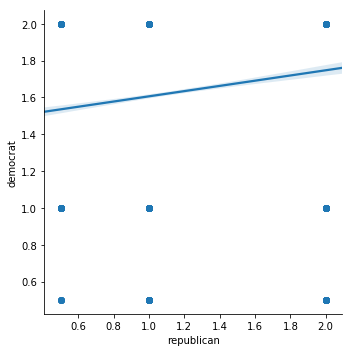

In [0]:


sns.lmplot(x='republican', y='democrat', data=rep_dem);